- Load the required dataset(image folders)

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_set = r"D:\HIMANTH DATA SCIENCE\Mini Projects\Mask project CNN\Final_Assignment_Face Mask Dataset\Train"
test_set = r"D:\HIMANTH DATA SCIENCE\Mini Projects\Mask project CNN\Final_Assignment_Face Mask Dataset\Test"
valid_set = r"D:\HIMANTH DATA SCIENCE\Mini Projects\Mask project CNN\Final_Assignment_Face Mask Dataset\Validation"

- Now let us bring all the images pixel values into same scale and do data augmentation for better results

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_valid_generator = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                          horizontal_flip=0.1,vertical_flip=0.1,
                                          zoom_range=0.2)

test_generator = ImageDataGenerator(rescale = 1./255)

In [7]:
labels = ['WithMask','WithoutMask']

In [8]:
train_data = train_valid_generator.flow_from_directory(train_set,target_size=(128,128),class_mode='binary',classes=labels,
                                                      batch_size=20)

valid_data = train_valid_generator.flow_from_directory(valid_set,target_size=(128,128),class_mode='binary',classes=labels,
                                                      batch_size=20)

test_data = test_generator.flow_from_directory(test_set,target_size=(128,128),class_mode='binary',classes = labels,
                                                      batch_size=20)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


`Therefore we have 10000 images in train_data and 800 images in valid_data and 992 images in test_data`

In [9]:
import matplotlib.pyplot as plt

- Now developing custom CNN architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.activations import relu,sigmoid

In [11]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),padding = 'same',activation='relu',input_shape= (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),padding = 'same',activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(8,(3,3),padding = 'same',activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())   # converting to 1 dimention

# Now connecting to ANN architecture

model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

- Adding optimizer, loss and ,metrics

In [13]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics='acc')

`Fitting train_data and valid_data to the model`

In [14]:
model.fit(train_data,steps_per_epoch= 500, epochs = 10,validation_data= valid_data, validation_steps= 40)

Epoch 1/10
500/500 [==============================] - 342s 680ms/step - loss: 0.2846 - acc: 0.8720 - val_loss: 0.2392 - val_acc: 0.9200
Epoch 2/10
500/500 [==============================] - 249s 498ms/step - loss: 0.1738 - acc: 0.9357 - val_loss: 0.1604 - val_acc: 0.9375
Epoch 3/10
500/500 [==============================] - 261s 521ms/step - loss: 0.1412 - acc: 0.9482 - val_loss: 0.1365 - val_acc: 0.9500
Epoch 4/10
500/500 [==============================] - 530s 1s/step - loss: 0.1384 - acc: 0.9504 - val_loss: 0.1258 - val_acc: 0.9538
Epoch 5/10
500/500 [==============================] - 268s 535ms/step - loss: 0.1224 - acc: 0.9562 - val_loss: 0.1304 - val_acc: 0.9563
Epoch 6/10
500/500 [==============================] - 271s 543ms/step - loss: 0.1154 - acc: 0.9585 - val_loss: 0.1250 - val_acc: 0.9563
Epoch 7/10
500/500 [==============================] - 278s 557ms/step - loss: 0.1109 - acc: 0.9626 - val_loss: 0.0849 - val_acc: 0.9675
Epoch 8/10
500/500 [==============================]

In [15]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [16]:
training_loss = model.history.history['loss']
training_acc = model.history.history['acc']
validation_loss = model.history.history['val_loss']
validation_acc = model.history.history['val_acc']

- Visualizing training and validation reports

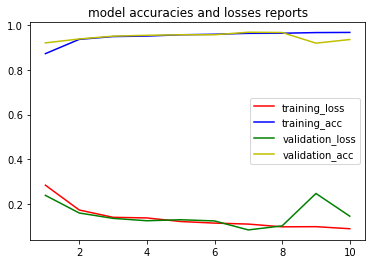

In [17]:
# Data Visualization
plt.title('model accuracies and losses reports')

plt.plot(np.arange(1,len(training_loss)+1),training_loss,color = 'r',label = 'training_loss')
plt.plot(np.arange(1,len(training_loss)+1),training_acc,color = 'b',label = 'training_acc')

plt.plot(np.arange(1,len(training_loss)+1),validation_loss,color = 'g',label = 'validation_loss')
plt.plot(np.arange(1,len(training_loss)+1),validation_acc,color = 'y',label = 'validation_acc')

plt.legend(loc = 0)

plt.show()

- Now checking test_data accuracy

In [18]:
y_test_pred = model.predict(test_data)

50/50 [==============================] - 15s 293ms/step


In [19]:
y_test_pred

array([[9.99543846e-01],
       [9.98445809e-01],
       [9.92307723e-01],
       [2.97974179e-06],
       [2.93370187e-01],
       [1.15036806e-02],
       [3.98315069e-06],
       [5.28396845e-01],
       [8.76099885e-01],
       [9.96516347e-01],
       [5.93200088e-01],
       [7.82804310e-01],
       [9.99138892e-01],
       [9.98446882e-01],
       [1.43732885e-02],
       [9.93903279e-01],
       [4.20535684e-07],
       [5.81340604e-02],
       [3.21546905e-02],
       [3.82557869e-01],
       [6.00141346e-01],
       [9.92026925e-01],
       [9.96425629e-01],
       [9.97367799e-01],
       [9.12459016e-01],
       [5.10014535e-04],
       [6.75992146e-02],
       [9.99712050e-01],
       [9.88935947e-01],
       [1.15146426e-09],
       [5.00527619e-07],
       [9.97953415e-01],
       [9.96544898e-01],
       [5.37043869e-01],
       [9.82473731e-01],
       [1.13930582e-04],
       [1.61351696e-08],
       [9.33306396e-01],
       [7.94672132e-01],
       [8.14797699e-01],


` we have got probability values but we want whether class 0 or class 1`

In [20]:
res = []
for i in y_test_pred:
    for j in i:
        if j < 0.5:
            res.append(0)
        else:
            res.append(1)

In [21]:
import sklearn

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
accuracy_score(test_data.classes,res)

0.5060483870967742

`So our model is clearly overfitted because our training accuracy is above 90% and our test accuracy is above 50%`

- Now using VGG19 CNN architecture and its best weights

In [24]:
from tensorflow.keras.applications import VGG19

In [25]:
conv_base = VGG19(include_top= False,weights = 'imagenet',input_shape=(128,128,3))

`now our convolutional base is ready now let us connect to our custom ANN architecture`

In [26]:
model_VGG19 = Sequential()
model_VGG19.add(conv_base)
model_VGG19.add(Flatten())
model_VGG19.add(Dense(256,activation = 'relu'))
model_VGG19.add(Dense(1,activation= 'sigmoid'))

In [27]:
model_VGG19.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


- Adding optimizer, loss and ,metrics to our VGG19 model

In [28]:
model_VGG19.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

` as our custom model is overfitted so let us change some parameters to overcome this overfitting`

In [29]:
train_valid_generator1 = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                          horizontal_flip=0.1,vertical_flip=0.1,
                                          zoom_range=0.2,rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2)

In [30]:
train_data1 = train_valid_generator1.flow_from_directory(train_set,target_size=(128,128),class_mode = 'binary',
                                                         classes = labels,batch_size = 32)
valid_data1 = train_valid_generator1.flow_from_directory(valid_set,target_size=(128,128),class_mode='binary',
                                                        classes = labels,batch_size= 32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


- let us fit this data to the model

In [31]:
model_VGG19.fit(train_data1,steps_per_epoch = 300,epochs = 5,validation_data = valid_data1,validation_steps = 25)

Epoch 1/5
300/300 [==============================] - 2289s 8s/step - loss: 0.4814 - acc: 0.8286 - val_loss: 0.2464 - val_acc: 0.8975
Epoch 2/5
300/300 [==============================] - 4582s 15s/step - loss: 0.2827 - acc: 0.8940 - val_loss: 0.4110 - val_acc: 0.7925
Epoch 3/5
300/300 [==============================] - 3091s 10s/step - loss: 0.2387 - acc: 0.9062 - val_loss: 0.1861 - val_acc: 0.9262
Epoch 4/5
300/300 [==============================] - 2346s 8s/step - loss: 0.2186 - acc: 0.9160 - val_loss: 0.1674 - val_acc: 0.9350
Epoch 5/5
300/300 [==============================] - 2264s 8s/step - loss: 0.1932 - acc: 0.9268 - val_loss: 0.1781 - val_acc: 0.9362


In [32]:
training_loss1 = model_VGG19.history.history['loss']
training_acc1 = model_VGG19.history.history['acc']
validation_loss1 = model_VGG19.history.history['val_loss']
validation_acc1 = model_VGG19.history.history['val_acc']

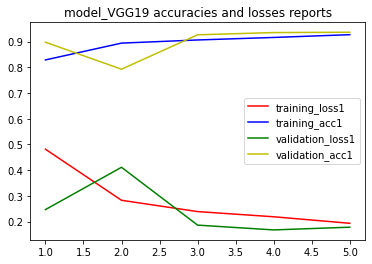

In [34]:
# Data Visualization
plt.title('model_VGG19 accuracies and losses reports')

plt.plot(np.arange(1,len(training_loss1)+1),training_loss1,color = 'r',label = 'training_loss1')
plt.plot(np.arange(1,len(training_loss1)+1),training_acc1,color = 'b',label = 'training_acc1')

plt.plot(np.arange(1,len(training_loss1)+1),validation_loss1,color = 'g',label = 'validation_loss1')
plt.plot(np.arange(1,len(training_loss1)+1),validation_acc1,color = 'y',label = 'validation_acc1')

plt.legend(loc = 0)

plt.show()

In [35]:
y_test_pred1 = model_VGG19.predict(test_data)

50/50 [==============================] - 72s 1s/step


In [36]:
res_VGG19 = []
for i in y_test_pred1:
    for j in i:
        if j < 0.5:
            res_VGG19.append(0)
        else:
            res_VGG19.append(1)

In [37]:
accuracy_score(test_data.classes,res_VGG19)

0.5070564516129032

In [38]:
import cv2

In [39]:
def prediction(path):
    image = plt.imread(path)
    print(image.shape)
    
    image = cv2.resize(image,(128,128))
    print(image.shape)
    
    image = np.array(image)/255.0
    
    image = np.expand_dims(image,axis = 0)
    
    result = model_VGG19.predict(image)
    print(result)
    
    if result[0][0] <= 0.5:
        print('person is wearing mask')
    else:
        print('stupid person is not wearing mask')

In [40]:
prediction("D:\osteoarthrities\withmask.webp")

(383, 383, 3)
(128, 128, 3)
1/1 [==============================] - 0s 260ms/step
[[0.2320675]]
person is wearing mask


In [41]:
prediction("D:\osteoarthrities\withoutmask.jpg")

(602, 583, 3)
(128, 128, 3)
1/1 [==============================] - 0s 90ms/step
[[0.9609712]]
stupid person is not wearing mask


In [42]:
prediction("D:\osteoarthrities\withoutmask1.jpg")

(900, 1200, 3)
(128, 128, 3)
1/1 [==============================] - 0s 86ms/step
[[0.07861161]]
person is wearing mask


In [43]:
prediction("D:\osteoarthrities\withoutmask2.jpg")

(1040, 492, 3)
(128, 128, 3)
1/1 [==============================] - 0s 107ms/step
[[0.04228046]]
person is wearing mask


In [46]:
prediction("D:\osteoarthrities\withoutmask5.jpg")

(1040, 492, 3)
(128, 128, 3)
1/1 [==============================] - 0s 101ms/step
[[0.09731803]]
person is wearing mask
